Refrence: https://towardsdatascience.com/a-comprehensive-state-of-the-art-image-recognition-tutorial-c34c544d0b4

#1. Setting up Libraries and Initialization

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Fastai library
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
bs = 64  #batchsize

In [3]:
np.random.seed(2)

#2. Data Extraction

In [4]:
path = untar_data(URLs.PETS) 

In [5]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [7]:
#Put the PATH of each of the subdirectories into some instance
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)

In [9]:
fnames[1]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_160.jpg')

In [10]:
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

**normalize** normalizes the data using the standard deviation and mean of ImageNet images.

#3. Data Visualization

In [12]:
img = data.train_ds[1]

In [13]:
img

(Image (3, 224, 224), Category 16)

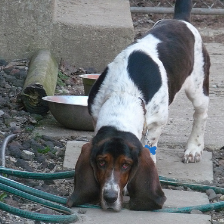

In [14]:
data.train_ds[0][0]

In [15]:
print (len(data.train_ds)) #Total Training Images
print (len(data.valid_ds)) #Total Validation Images

5912
1478


In [16]:
data.c #Total number of classes in our dataset

37

In [17]:
data.classes #Classes labels

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

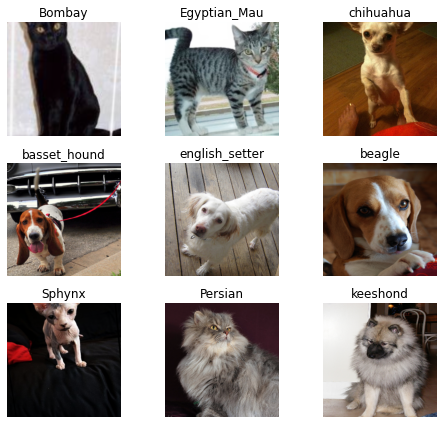

In [18]:
data.show_batch(rows=3, figsize=(7,6))

#4.Model Training

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


**cnn_learner** builds a convulotional neural network (CNN) learner using a pretrained model from a given architecture, i.e resnet34. The learned parameters from the pretrained model are used to initialize our model, allowing a faster convergence with a high accuracy.





The accuracy achieved is (1 - error_rate) * 100%

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.375391,0.333786,0.104195,01:56
1,0.611449,0.312503,0.100135,01:56
2,0.398120,0.236391,0.076455,01:57
3,0.291403,0.228283,0.079161,01:57


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epoch	(train_loss)	(valid_loss)	(error_rate)	(time)

  0	     (1.375391)	  (0.333786)   	(0.104195)	  (01:56)

  1	     (0.611449)  	(0.312503)   	(0.100135)  	(01:56)

  2	     (0.398120)	  (0.236391)	  (0.076455)	  (01:57)

  3	     (0.291403)	  (0.228283)	  (0.079161)	  (01:57)

The accuracy achieved is (1 - error_rate) * 100%

Accuracy = 1 - 0.079161  = 0.920839

Thus 92% accuracy obtaines

        

In [22]:
learn.save('stage-1')

#5. Results interpretation

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

ClassificationInterpretation provides a visualization of the misclassfied images.

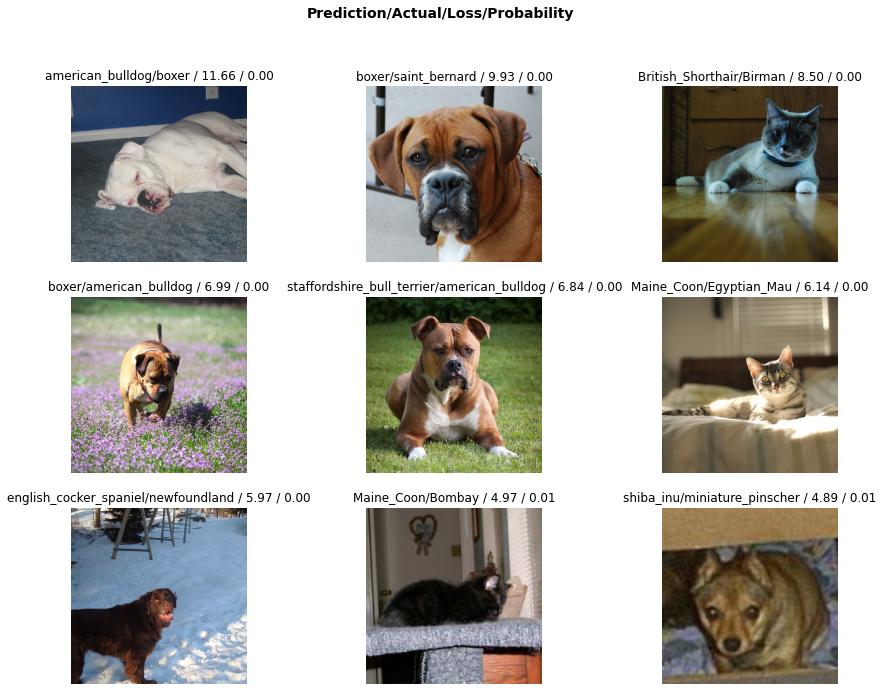

In [25]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

plot_top_losses shows images with top losses along with their:
prediction label / actual label / loss / probability of actual image class.

A high loss implies high confidence about the wrong answer. Plotting top losses is great way to visualize and interpret classification results.



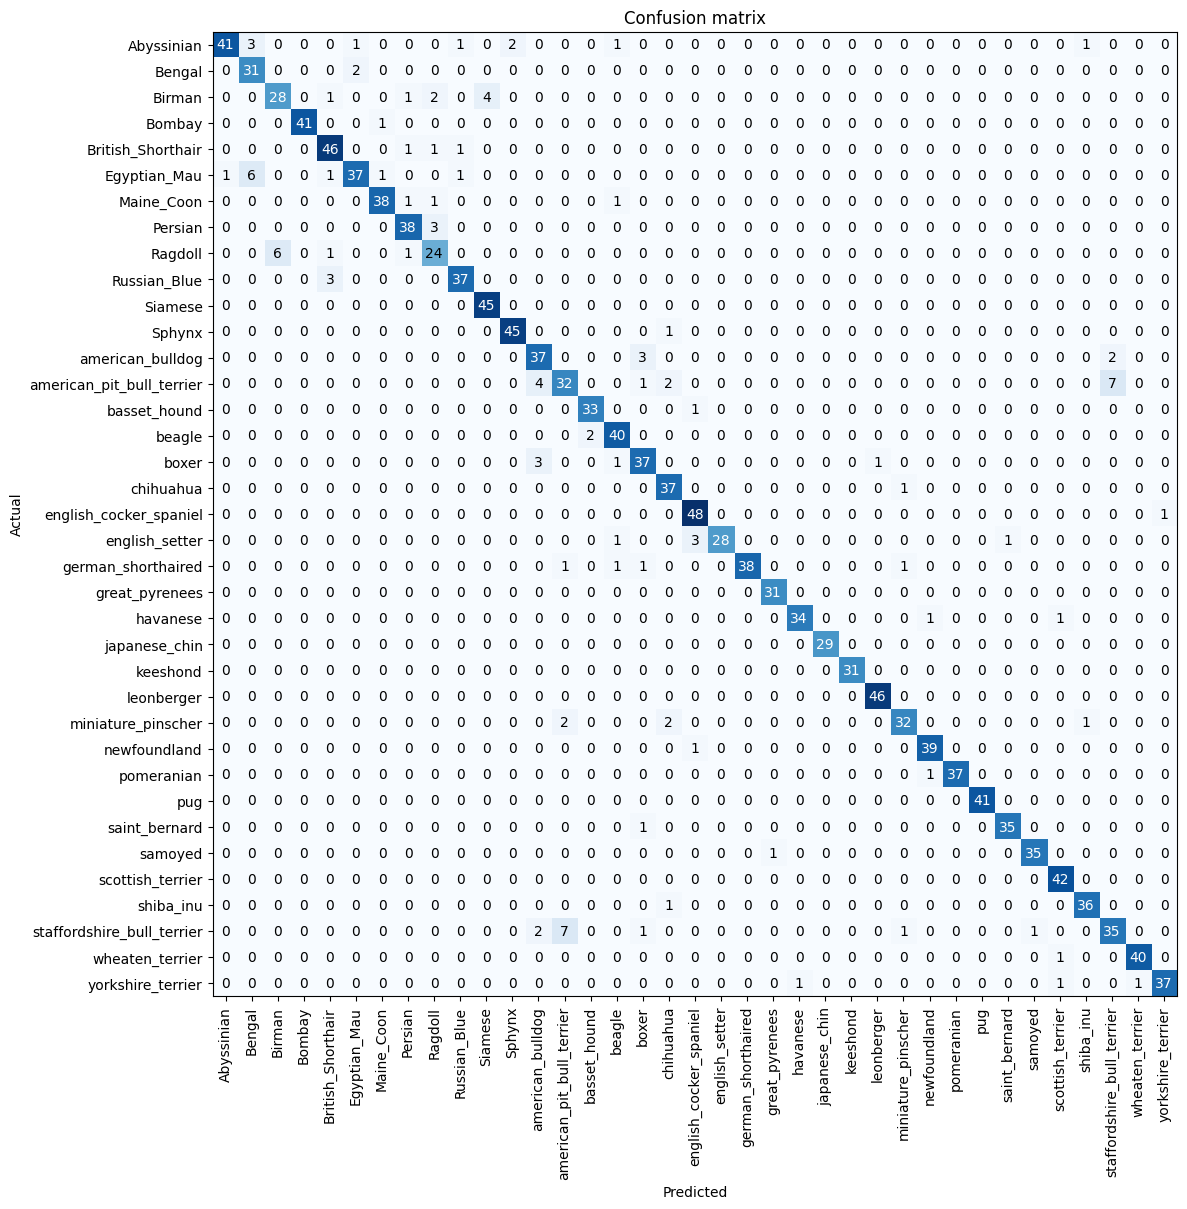

In [32]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=100)

In a confusion matrix, the diagonal elements represent the number of images for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In [33]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('Birman', 'Siamese', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'boxer', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'chihuahua', 2),
 ('beagle', 'basset_hound', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

**most_confused** simply grabs out of the confusion matrix the most confused combinations of predicted and actual categories; in other words, the ones that it got wrong most often.

#6. Freezing and Unfreezing

We can always train all layers of the network by calling unfreeze function, followed by fit or fit_one_cycle.

In [34]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.690798,0.610265,0.163735,02:04
1,0.443819,0.297524,0.091340,02:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epoch	(train_loss)	(valid_loss)	(error_rate)	(time)

0	(0.690798)	(0.610265)	(0.163735)	(02:04)

1	(0.443819)	(0.297524)	(0.091340)	(02:04)

Accuracy = 1-0.091340 = 0.90866

The accuracy now is a little worse than before.

Why?

Training all layers at the same speed tries to update the parameters of the lower layers as much as of the higher layers, which is not what we desire since the first layers do not need much change.

The changes made to the layers' parameters (weights) are controlled by the learning rate. This hyper-parameter is a key parameter for adequate model training, it adjusts the weights of the network with respect to the gradient of the loss.

Therefore, a clever approach to update the parameters of the different layers is to use different learning rates for the lower and higher layers.

The process of tuning the parameters is often called fine-tuning.

#7. Fine-Tuning

Let's load the model we had previously saved.

In [37]:
learn.load('stage-1')

Previously, we did not specify the learning rate so the default was used, which is set to 0.003.

In order to find the most appropriate learning rate, we run lr_find. This function uses Cyclical Learning Rates, where the learning rate is increased from a very small value until the loss stops decreasing.

In [ ]:
learn.lr_find()

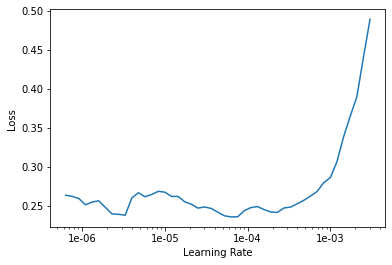

In [40]:
learn.recorder.plot()

From the plot, we find that the ideal learning rate is around 1e-4 or lower, as the Loss starts to significantly increase following that.

Therefore, we choose 1e-4 as a learning rate for the last layers and a much smaller rate of 1e-6 for the intial layers.

In general, higher learning rate makes sure that the machine ends up learning faster, but too high of a learning rate can fail to converge. Small learning rates take more time to reach the accurate result. Thus, picking an adequate learning rate is crucial for model training.

Now that we picked the learning rates for our layers, we can unfreeze the model and train accordingly.

In [42]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.231968,0.220699,0.071042,01:58
1,0.212121,0.213130,0.069012,01:58
2,0.191896,0.208560,0.063599,01:57
3,0.176178,0.201470,0.062246,01:57


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

epoch	(train_loss)	(valid_loss)	(error_rate	time)

0	(0.231968)	(0.220699)	(0.071042)	(01:58)

1	(0.212121)	(0.213130)	(0.069012)	(01:58)

2	(0.191896)	(0.208560)	(0.063599)	(01:57)

3	(0.176178)	(0.201470)	(0.062246)	(01:57)

Accuracy = 1-0.062246 = 0.937754

Thus 93.7%

This increasae in accuracy is due to the change in learning rates from the innermost layer to the outermost layer.

This is done with the help of **fit_one_cycle(max_lr=slice())** function

The model can be further improved using a deeper architecture, such as resnet50 which has 50 layers instead. Also, using larger image size would allow the model to capture more details. Such changes will indeed require more GPU memory.

**We have successfully built an Image Recognizer for the Pets Breeds dataset.**